In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'clip_to_image_size' from 'keras.src.layers.preprocessing.image_preprocessing.bounding_boxes.converters' (C:\Users\DELL\miniconda3\Lib\site-packages\keras\src\layers\preprocessing\image_preprocessing\bounding_boxes\converters.py)

In [2]:
tranining_set = tf.keras.utils.image_dataset_from_directory(
    'data/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

ImportError: cannot import name 'clip_to_image_size' from 'keras.src.layers.preprocessing.image_preprocessing.bounding_boxes.converters' (C:\Users\DELL\miniconda3\Lib\site-packages\keras\src\layers\preprocessing\image_preprocessing\bounding_boxes\converters.py)

##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer


In [ ]:
# Add the Input layer only once at the beginning
cnn.add(tf.keras.layers.Input(shape=[64, 64, 3]))

In [ ]:
# Add the rest of the layers
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      31,490,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │          18,468 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,547,748 (120.35 MB)

 Trainable params: 31,547,748 (120.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=tranining_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.0324 - loss: 183.5256 - val_accuracy: 0.1766 - val_loss: 3.4890
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.0887 - loss: 3.4691 - val_accuracy: 0.3447 - val_loss: 2.8006
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1808 - loss: 3.1677 - val_accuracy: 0.4758 - val_loss: 2.2422
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2793 - loss: 2.7712 - val_accuracy: 0.5584 - val_loss: 2.0970
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.4103 - loss: 2.2909 - val_accuracy: 0.6467 - val_loss: 1.7653
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.4519 - loss: 2.2079 - val_accuracy: 0.6980 - val_loss: 1.6785
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.5461 - loss: 1.7871 - val_accuracy: 0.7208 - val_loss: 1.6825
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.5872 - loss: 1.7284 - val_accuracy: 0.7293 -

#Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(tranining_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 558ms/step - accuracy: 0.9332 - loss: 0.3094
Training accuracy: 0.936959981918335


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 712ms/step - accuracy: 0.9264 - loss: 0.9217
Validation accuracy: 0.9088318943977356


#Saving Model

In [ ]:
cnn.save('trained_model.keras')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.035840000957250595,
  0.10751999914646149,
  0.22815999388694763,
  0.32416000962257385,
  0.44383999705314636,
  0.4902400076389313,
  0.5625600218772888,
  0.6006399989128113,
  0.6249600052833557,
  0.650879979133606,
  0.692799985408783,
  0.7049599885940552,
  0.7123200297355652,
  0.7094399929046631,
  0.7353600263595581,
  0.7686399817466736,
  0.7676799893379211,
  0.7728000283241272,
  0.7888000011444092,
  0.8009600043296814,
  0.8054400086402893,
  0.7980800271034241,
  0.8144000172615051,
  0.8262400031089783,
  0.8332800269126892,
  0.8425599932670593,
  0.8364800214767456,
  0.8457599878311157,
  0.8723199963569641,
  0.8726400136947632,
  0.8851199746131897,
  0.89055997133255],
 'loss': [51.959930419921875,
  3.4046828746795654,
  2.9766106605529785,
  2.5770208835601807,
  2.1605944633483887,
  2.0477776527404785,
  1.742027759552002,
  1.6801550388336182,
  1.5298740863800049,
  1.527758240699768,
  1.317760944366455,
  1.3262577056884766,
  1.21965813

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.88318943977356 %


#Accuracy Visualization

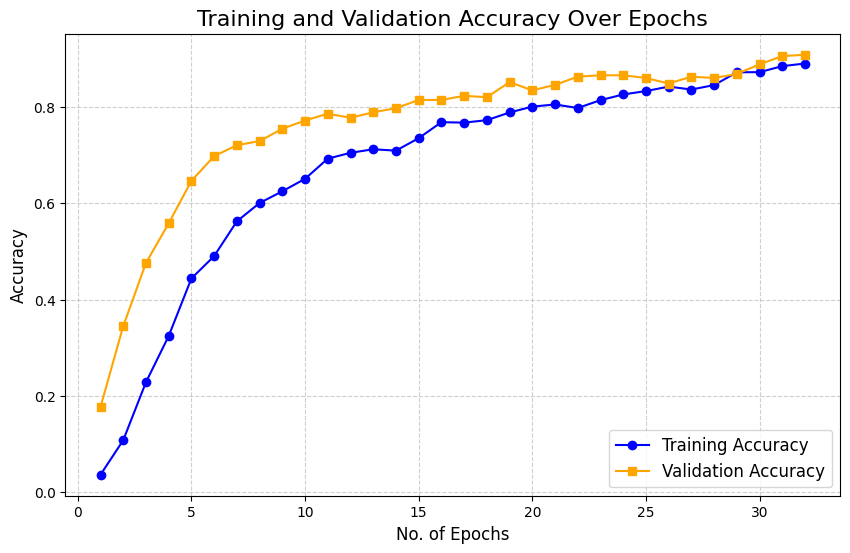

In [ ]:
epochs = [i for i in range(1, 33)]

plt.figure(figsize=(10, 6))

plt.plot(epochs, training_history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')

plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='s')

plt.xlabel('No. of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy Over Epochs', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

#Train and Validate set Evaluation

In [60]:
cnn.evaluate(tranining_set)
cnn.evaluate(validation_set)

98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 600ms/step - accuracy: 0.9393 - loss: 0.2878
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 574ms/step - accuracy: 0.9312 - loss: 0.6624


[1.075242519378662, 0.9088318943977356]